In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

0
1
2
3
4
5


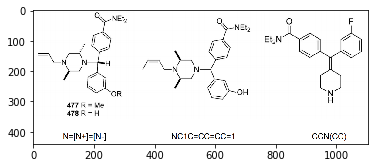

In [6]:

# Load image, grayscale, Otsu's threshold
image = cv2.imread('C:/Users/aadam/Desktop/opencv_test.png')
original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
print("0")
# Dilate with horizontal kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20,10))
dilate = cv2.dilate(thresh, kernel, iterations=2)
print("1")
# Find contours and remove non-diagram contours
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    area = cv2.contourArea(c)
    if w/h > 2 and area > 10000:
        cv2.drawContours(dilate, [c], -1, (0,0,0), -1)
print("2")
# Iterate through diagram contours and form single bounding box
boxes = []
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    boxes.append([x,y, x+w,y+h])
print("3")
boxes = np.asarray(boxes)
x = np.min(boxes[:,0])
y = np.min(boxes[:,1])
w = np.max(boxes[:,2]) - x
h = np.max(boxes[:,3]) - y

# Extract ROI
cv2.rectangle(image, (x,y), (x + w,y + h), (36,255,12), 3)
ROI = original[y:y+h, x:x+w]
print("4")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(dilate, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(ROI, cv2.COLOR_BGR2RGB))
#cv2.waitKey(20)
print("5")